In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
!pip install wget

In [7]:
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

'ChineseFont (1).ttf'

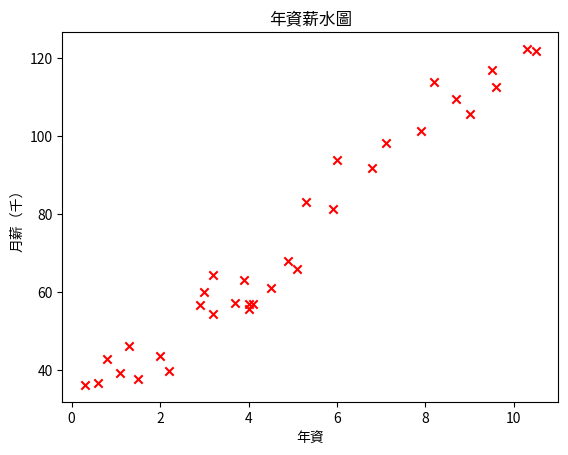

In [8]:
# y = w*x + b
x=data["YearsExperience"]
y=data["Salary"]

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
plt.scatter(x,y,marker="x", color="red")
plt.title("年資薪水圖")
plt.xlabel("年資")
plt.ylabel("月薪（千）")
plt.show()

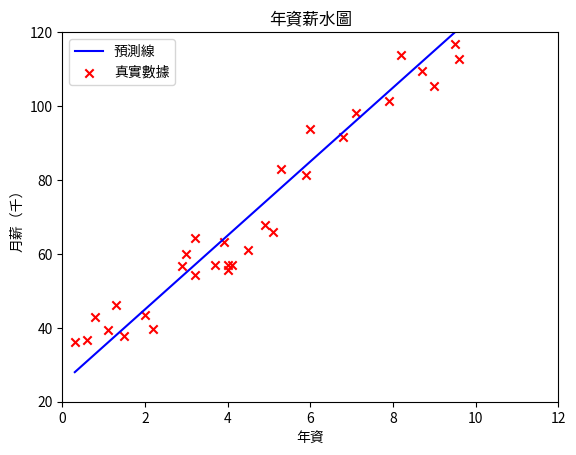

In [9]:
def plot_pred(w, b):
  y_pred=x*w + b
  plt.plot(x,y_pred, color="blue",label="預測線")
  plt.scatter(x,y,marker="x", color="red",label="真實數據")
  plt.title("年資薪水圖")
  plt.xlabel("年資")
  plt.ylabel("月薪（千）")
  plt.xlim([0,12])
  plt.ylim([20,120])
  plt.legend()
  plt.show()

plot_pred(10, 25)

In [10]:
from ipywidgets import interact
interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

In [11]:
import pandas as pd
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data
# y = w*x + b
x=data["YearsExperience"]
y=data["Salary"]

In [12]:
# cost function
w = 9.8
b = 23.5
y_pred = w*x + b
cost = (y - y_pred)**2
cost.sum() / len(x)

37.96320000000001

In [13]:
# 定義compute_cost 的function
def compute_cost(x, y, w, b):
  y_pred = w*x +b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [14]:
compute_cost(x, y, 9.8, 23.5)

37.96320000000001

In [15]:
# b=0 w=-100~101 cost 是多少
costs = []
for w in range(-100, 101):
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

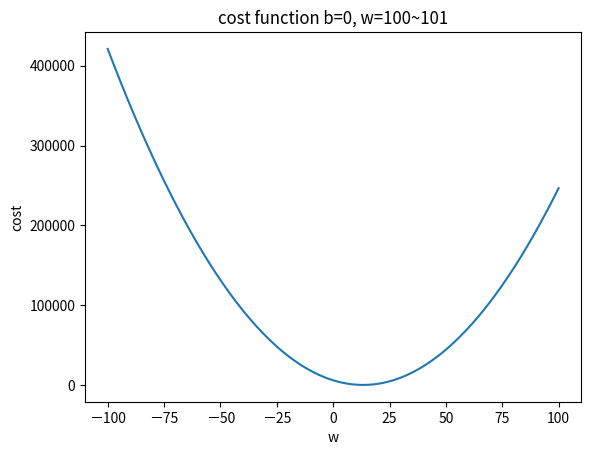

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(-100,101), costs)
plt.title("cost function b=0, w=100~101")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()


In [17]:
# b=-100~101 w=-100~101 cost 是多少
import numpy as np
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1
costs


array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

32.6948484848485
w is = [109] 
b is = [129]
當 w = [9] 且 b = [29] 時，有最小cost:[32.69484848]


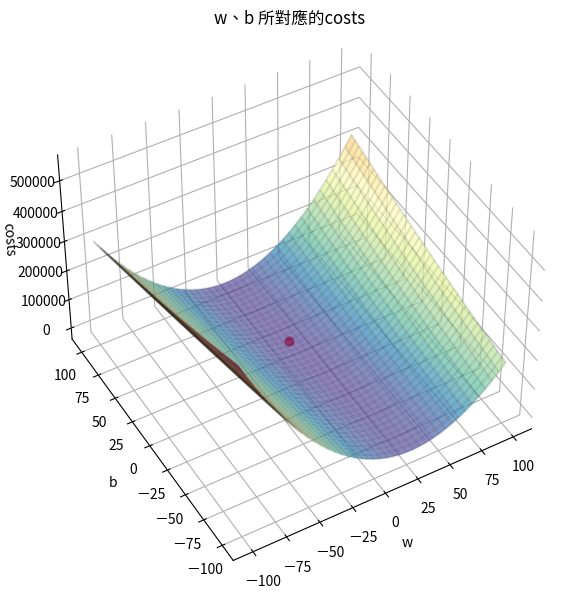

In [25]:
#COST FUNCTION

# 安裝中文字體
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
plt.figure(figsize=(7, 7))
# 3D繪圖套件
ax = plt.axes(projection="3d")
# 圖形旋轉: NAME.view_init(上下, 左右)
ax.view_init(45, -120)
# 顏色
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))
# 畫圖 3D -> 2D
b_grid, w_grid = np.meshgrid(bs, ws) # 二維網格
ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)
# cmap: 顏色、alpha: 不透明度
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1) # 邊框顏色
ax.set_title("w、b 所對應的costs ")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")
# 找出最低點
print(np.min(costs))
# 最低點w跟b
w_index, b_index = np.where(costs==np.min(costs))
print("w is =", w_index, "\nb is =", b_index)
print("當 w =", ws[w_index], "且 b =", bs[b_index], f"時，有最小cost:{costs[w_index, b_index]}")
# 畫點
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
# 秀圖
plt.show()